## COVID19 database query

### Enter the state code below and run all cells

In [ ]:
mystate='NJ'

In [88]:
import pandas as pd
df_nj=pd.read_json('https://covidtracking.com/api/v1/states/'+mystate+'/daily.json')
df_nj['date'] = pd.to_datetime(df_nj['date'],  format='%Y%m%d')
#select two columns, also reverse the order of the rows
df=df_nj[['date','death']][::-1]
df=df.set_index('date')
df=df.dropna()
df['new death']=df['death'].diff()
df.tail(10)

,death,new death
date,,
2020-04-26,5938.0,75.0
2020-04-27,6044.0,106.0
2020-04-28,6442.0,398.0
2020-04-29,6770.0,328.0
2020-04-30,7228.0,458.0
2020-05-01,7538.0,310.0
2020-05-02,7742.0,204.0
2020-05-03,7871.0,129.0
2020-05-04,7910.0,39.0


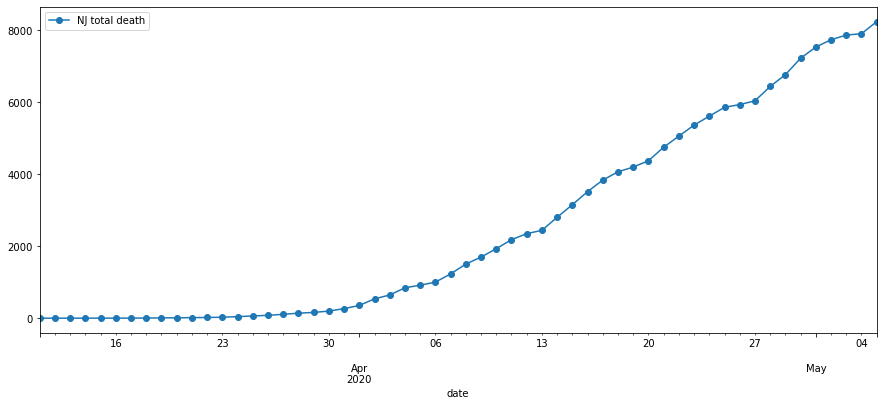

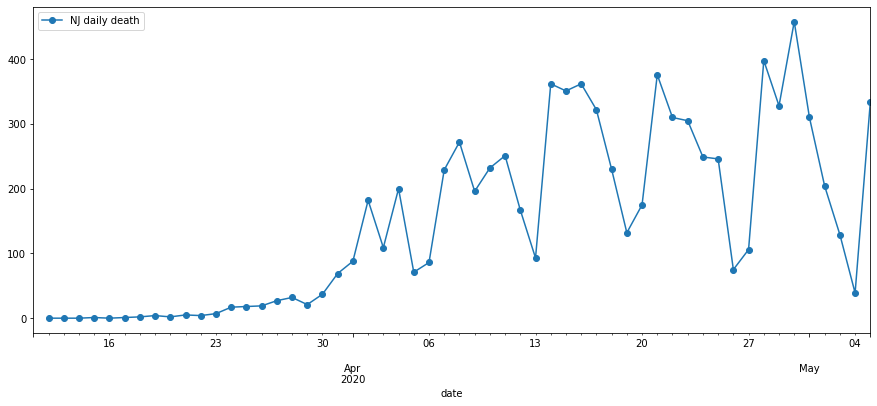

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15, 6))
df['death'].plot(marker='o',label=mystate+' total death');
plt.legend();

plt.figure(figsize=(15, 6))
ts = pd.Series(df['death'])
ts.diff().plot(marker='o',label=mystate+' daily death')
plt.legend()

## Is it exponential?

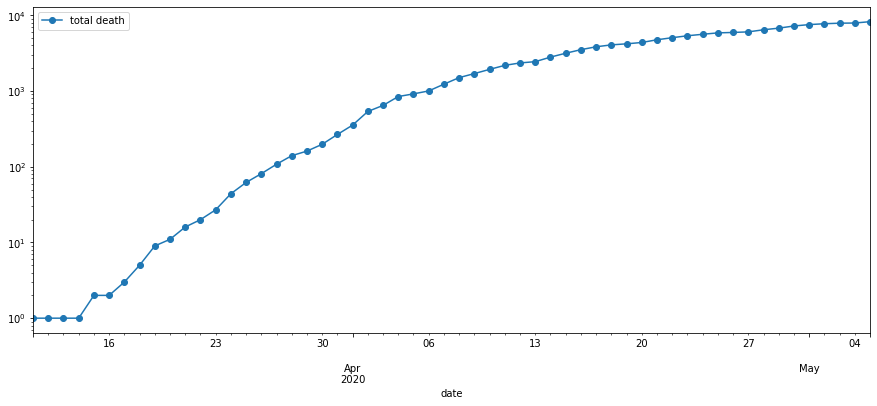

In [91]:
plt.figure(figsize=(15, 6))
df['death'].plot(logy=True, marker='o',label='total death');
plt.legend();

### Other ways of getting the data

In [44]:
import requests
api_response = requests.get('https://covidtracking.com/api/states?state='+mystate)
api_response.json()['dateChecked'],api_response.json()['death']

('2020-05-05T19:57:00Z', 8244)

In [45]:
daily_nj = requests.get('https://covidtracking.com/api/v1/states/'+mystate+'/daily.json')
daily_nj.json()[0]['date'], daily_nj.json()[0]['death']

(20200505, 8244)

In [50]:
#someone wrote a python api
#import COVID19Py
#covid19 = COVID19Py.COVID19(data_source="csbs")
#covid19.getLatest()
#location = covid19.getLocationByCountryCode("US", timelines=True)
#mercer = covid19.getLocationById(66)
#print(mercer)
#jhu = COVID19Py.COVID19(data_source="jhu")
#print(jhu.getLatest())
#print(jhu.getLatestChanges())
##{'confirmed': 3583055, 'deaths': 251537, 'recovered': 0}
##{'confirmed': 0, 'deaths': 0, 'recovered': 0}